# Neural Network from Scratch Project

This aim of this project is to create a simple neural network with one input layer, and one output layer. This neural network will be used to predict the digits depicted in 28x28 pixel drawings (MNIST dataset).

In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [4]:
# Import MNIST dataset.
mnist = fetch_openml('mnist_784', parser='auto')

In [5]:
# Add label column to DataFrame and convert to array
data_df = mnist.data.copy()
data_df['label'] = mnist.target
data = np.array(mnist.data)
data_df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


Number represented: 5


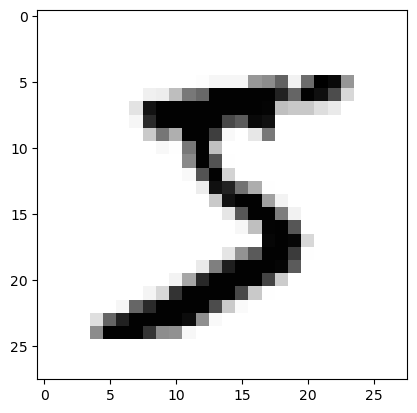

Number represented: 0


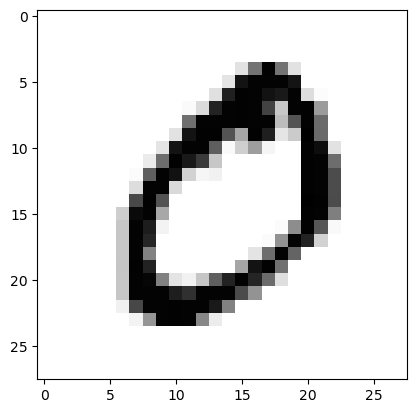

Number represented: 4


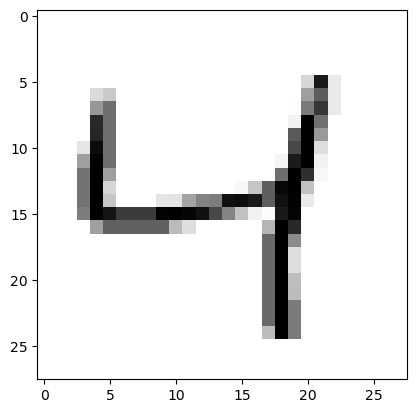

In [53]:
# Ensure labels match provided data by checking a few examples
for i in range(3):
    print(f"Number represented: {data_df.iloc[i][-1]}")
    plt.imshow(data[i].reshape(28,28),cmap='Greys')
    plt.show()

In [186]:
# PREPROCESSING

# Separate training and testing data
X_train, X_test, y_train, y_test = train_test_split(data, np.array(mnist.target.astype('int')), test_size=0.25, random_state=15)
X_train = X_train / 255
X_test = X_test / 255

In [187]:
# TRAINING

# Initialize parameters randomly
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

# Activation functions
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))

# Forward propagation: Predicting output based on weights(W1 & W2) and biases (b1 & b2)
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2
 
# Number label used to create one hot encoded array label for each value in training set
def one_hot_encode(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size),Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

# Derivative of the activation function from the forward propagation
def deriv_ReLU(Z):
    return Z > 0

# Backward propagation: Determining necessary changes to parameters based on training labels
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot_encode(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1/ m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1/ m * np.sum(dZ1)
    return dW1, db1, dW2, db2

# Adjusting parameters for next forward propagation
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [190]:
# PREDICTIONS

# Return an array of the neural network's predictions
def get_predictions(A2):
    return np.argmax(A2, 0)

# Compare the predictions to the 
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y)/ Y.size

# Combining all the steps to train the neural network
def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2

In [191]:
# Running everything together
W1, b1, W2, b2 = gradient_descent(X_train.T, y_train, 500, 0.1)

Iteration:  0
[9 9 6 ... 0 0 9] [1 1 2 ... 6 5 2]
Accuracy:  0.12874285714285713
Iteration:  50
[1 1 2 ... 3 6 2] [1 1 2 ... 6 5 2]
Accuracy:  0.5291619047619047
Iteration:  100
[1 1 2 ... 6 6 2] [1 1 2 ... 6 5 2]
Accuracy:  0.6710857142857143
Iteration:  150
[1 1 2 ... 6 6 2] [1 1 2 ... 6 5 2]
Accuracy:  0.7456952380952381
Iteration:  200
[1 1 2 ... 6 6 2] [1 1 2 ... 6 5 2]
Accuracy:  0.7867428571428572
Iteration:  250
[1 1 2 ... 6 6 2] [1 1 2 ... 6 5 2]
Accuracy:  0.8096190476190476
Iteration:  300
[1 1 2 ... 6 6 2] [1 1 2 ... 6 5 2]
Accuracy:  0.8257904761904762
Iteration:  350
[1 1 2 ... 6 6 2] [1 1 2 ... 6 5 2]
Accuracy:  0.8376761904761905
Iteration:  400
[1 1 2 ... 6 6 2] [1 1 2 ... 6 5 2]
Accuracy:  0.8454857142857143
Iteration:  450
[1 1 2 ... 6 6 2] [1 1 2 ... 6 5 2]
Accuracy:  0.8526857142857143


Number predicted: [2]
Number represented: 2


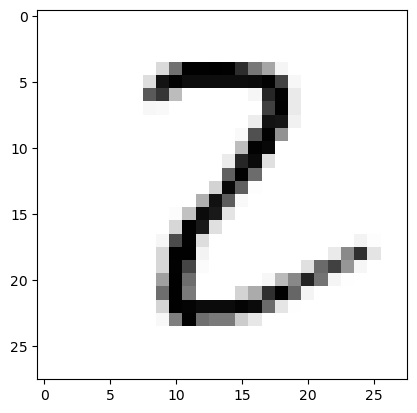

Number predicted: [6]
Number represented: 5


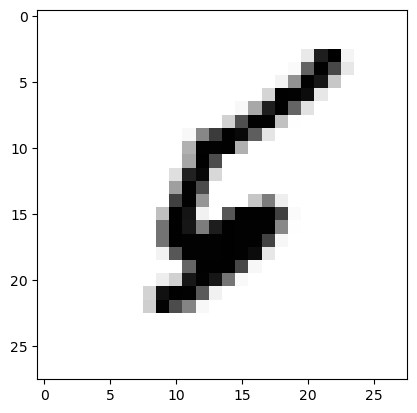

Number predicted: [6]
Number represented: 6


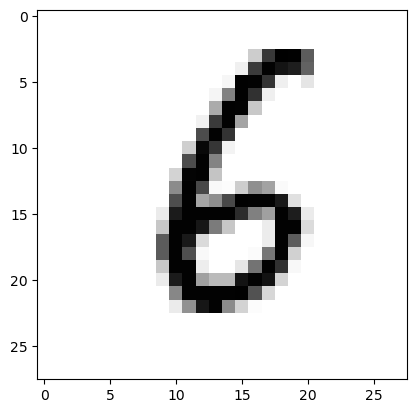

In [243]:
# Training set predictions 
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[index,:,None]
    prediction = make_predictions(current_image, W1, b1, W2, b2)
    label = y_train[index]
    print(f"Number predicted: {prediction}")
    print(f"Number represented: {label}")
    plt.imshow(X_train[index].reshape((28,28))*255, cmap='Greys')
    plt.show()

# Last 3 images of the training set to show neural network's accuracy
for i in range(-1,-4,-1):
    test_prediction(i, W1, b1, W2, b2)

In [246]:
# Predictions on the test data
test_predictions = make_predictions(X_test.T, W1, b1, W2, b2)
get_accuracy(test_predictions, y_test)

[3 2 2 ... 8 4 3] [5 2 2 ... 7 4 3]


0.8625714285714285

The neural network was able to achieve an accuracy slightly above 85% during the training and scored just above 86% when predicting the test data.
These accuracy scores are very similar to the original version of this project despite there being over 10,000 more images in the training data (28% more) and the testing data (1750% more). This shows how the increase in data did not greatly affect the accuracy when the training process (structure, learning rate, and iterations) stayed the same.